In [1]:
import pandas as pd
import numpy as np

In [2]:
train = pd.read_csv('/content/train.csv')
test = pd.read_csv('/content/test.csv')

In [3]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
train['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [5]:
def transformar_sexo(valor):
  if valor == 'female':
    return 1
  else:
    return 0

train['Sex_binario'] = train['Sex'].map(transformar_sexo)

In [6]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [7]:
#?train_test_split

In [8]:
#variaveis prioritárias no resgate, mulheres e crianças
variaveis = ['Sex_binario', 'Age']

In [9]:
X = train[variaveis]
y = train['Survived']

In [10]:
X = X.fillna(-1)

In [11]:
X_falso = np.arange(10)
X_falso

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [12]:
np.random.seed(0)
train_test_split(X_falso)

[array([9, 1, 6, 7, 3, 0, 5]), array([2, 8, 4])]

In [13]:
np.random.seed(1)
X_treino, X_valid, y_treino, y_valid = train_test_split(X, y, test_size=0.5)

In [14]:
X_treino

,Sex_binario,Age
394,1,24.00
851,0,74.00
373,0,22.00
523,1,44.00
78,0,0.83
...,...,...
715,0,19.00
767,1,30.50
72,0,21.00
235,1,-1.00


In [15]:
modelo = RandomForestClassifier(n_estimators=100, n_jobs=1, random_state=1)

In [16]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_binario
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [17]:
X.head()

,Sex_binario,Age
0,0,22.0
1,1,38.0
2,1,26.0
3,1,35.0
4,0,35.0


In [18]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [19]:
modelo.fit(X_treino, y_treino)

RandomForestClassifier(n_jobs=1, random_state=1)

In [20]:
modelo.fit(X_treino, y_treino)

RandomForestClassifier(n_jobs=1, random_state=1)

In [21]:
p = modelo.predict(X_valid)
p

array([1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1,

In [22]:
np.mean(y_valid == p)

0.7466367713004485

In [23]:
p = (X_valid['Sex_binario'] == 1).astype(np.int64)
np.mean(y_valid == p)

0.7623318385650224

# Validacao Cruzada

In [24]:
X_falso

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [25]:
from sklearn.model_selection import RepeatedKFold

In [26]:
kf = RepeatedKFold(n_splits=2, n_repeats=10, random_state=10)
for linhastreino, linhastest in kf.split(X_falso):
  print('treino', linhastreino)
  print('validacao', linhastest)

treino [0 1 4 7 9]
validacao [2 3 5 6 8]
treino [2 3 5 6 8]
validacao [0 1 4 7 9]
treino [0 1 2 8 9]
validacao [3 4 5 6 7]
treino [3 4 5 6 7]
validacao [0 1 2 8 9]
treino [0 3 4 8 9]
validacao [1 2 5 6 7]
treino [1 2 5 6 7]
validacao [0 3 4 8 9]
treino [1 4 6 8 9]
validacao [0 2 3 5 7]
treino [0 2 3 5 7]
validacao [1 4 6 8 9]
treino [1 3 6 7 8]
validacao [0 2 4 5 9]
treino [0 2 4 5 9]
validacao [1 3 6 7 8]
treino [0 2 6 7 8]
validacao [1 3 4 5 9]
treino [1 3 4 5 9]
validacao [0 2 6 7 8]
treino [0 2 6 7 9]
validacao [1 3 4 5 8]
treino [1 3 4 5 8]
validacao [0 2 6 7 9]
treino [0 1 2 4 6]
validacao [3 5 7 8 9]
treino [3 5 7 8 9]
validacao [0 1 2 4 6]
treino [2 4 7 8 9]
validacao [0 1 3 5 6]
treino [0 1 3 5 6]
validacao [2 4 7 8 9]
treino [2 3 5 6 9]
validacao [0 1 4 7 8]
treino [0 1 4 7 8]
validacao [2 3 5 6 9]


In [27]:
  resultados = []


  kf = RepeatedKFold(n_splits=2, n_repeats=10, random_state=0)
  for linhas_treino, linhas_valid in kf.split(X):
    print('treino', linhas_treino.shape[0])
    print('validacao', linhas_valid.shape[0])
    print()

    X_treino, X_valid = X.iloc[linhas_treino], X.iloc[linhas_valid]
    y_treino, y_valid = y.iloc[linhas_treino], y.iloc[linhas_valid]


    modelo = RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=1)
    modelo.fit(X_treino, y_treino)

    p = modelo.predict(X_valid)

    acc = np.mean(y_valid == p)
    resultados.append(acc)
    print("acc", acc)
    print()


  #print(X_treino.head())
  #print()

treino 445
validacao 446

acc 0.7713004484304933

treino 446
validacao 445

acc 0.7797752808988764

treino 445
validacao 446

acc 0.7331838565022422

treino 446
validacao 445

acc 0.7640449438202247

treino 445
validacao 446

acc 0.7466367713004485

treino 446
validacao 445

acc 0.7617977528089888

treino 445
validacao 446

acc 0.757847533632287

treino 446
validacao 445

acc 0.7617977528089888

treino 445
validacao 446

acc 0.757847533632287

treino 446
validacao 445

acc 0.7707865168539326

treino 445
validacao 446

acc 0.7466367713004485

treino 446
validacao 445

acc 0.7617977528089888

treino 445
validacao 446

acc 0.7645739910313901

treino 446
validacao 445

acc 0.7685393258426966

treino 445
validacao 446

acc 0.7399103139013453

treino 446
validacao 445

acc 0.7707865168539326

treino 445
validacao 446

acc 0.7399103139013453

treino 446
validacao 445

acc 0.7393258426966293

treino 445
validacao 446

acc 0.742152466367713

treino 446
validacao 445

acc 0.7730337078651686



In [28]:
resultados

[0.7713004484304933,
 0.7797752808988764,
 0.7331838565022422,
 0.7640449438202247,
 0.7466367713004485,
 0.7617977528089888,
 0.757847533632287,
 0.7617977528089888,
 0.757847533632287,
 0.7707865168539326,
 0.7466367713004485,
 0.7617977528089888,
 0.7645739910313901,
 0.7685393258426966,
 0.7399103139013453,
 0.7707865168539326,
 0.7399103139013453,
 0.7393258426966293,
 0.742152466367713,
 0.7730337078651686]

In [29]:
np.mean(resultados)

0.7575842696629215

In [30]:
import matplotlib.pyplot as plt
%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


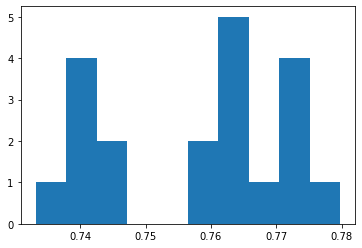

In [31]:
pylab.hist(resultados);

# Novos Parâmetros

In [32]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_binario
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [33]:
variaveis = ['Sex_binario', 'Age', 'Pclass', 'SibSp', 'Parch', 'Fare']

In [34]:
X = train[variaveis].fillna(-1)
y = train['Survived']

In [39]:
novos_resultados = []

kf = RepeatedKFold(n_splits=2, n_repeats=10, random_state=10)

for linhas_treino, linhas_valid in kf.split(X):
  print('Treino', linhas_treino.shape[0])
  print('Valid', linhas_valid.shape[0])
  print()

  X_treino, X_valid = X.iloc[linhas_treino], X.iloc[linhas_valid]
  y_treino, y_valid = y.iloc[linhas_treino], y.iloc[linhas_valid]

  modelo = RandomForestClassifier(n_estimators=100, n_jobs=1, random_state=0)

  modelo.fit(X_treino, y_treino)

  p = modelo.predict(X_valid)

  acc = np.mean(y_valid == p)

  novos_resultados.append(acc)
  print('acc', acc)
  print()

Treino 445
Valid 446

acc 0.7869955156950673

Treino 446
Valid 445

acc 0.7797752808988764

Treino 445
Valid 446

acc 0.827354260089686

Treino 446
Valid 445

acc 0.8179775280898877

Treino 445
Valid 446

acc 0.7847533632286996

Treino 446
Valid 445

acc 0.7842696629213484

Treino 445
Valid 446

acc 0.8161434977578476

Treino 446
Valid 445

acc 0.7842696629213484

Treino 445
Valid 446

acc 0.8004484304932735

Treino 446
Valid 445

acc 0.8

Treino 445
Valid 446

acc 0.8183856502242153

Treino 446
Valid 445

acc 0.802247191011236

Treino 445
Valid 446

acc 0.8116591928251121

Treino 446
Valid 445

acc 0.8067415730337079

Treino 445
Valid 446

acc 0.820627802690583

Treino 446
Valid 445

acc 0.7887640449438202

Treino 445
Valid 446

acc 0.8385650224215246

Treino 446
Valid 445

acc 0.8044943820224719

Treino 445
Valid 446

acc 0.7982062780269058

Treino 446
Valid 445

acc 0.8112359550561797



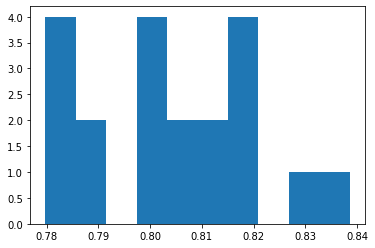

In [41]:
pylab.hist(novos_resultados);

In [42]:
np.mean(resultados)

0.8040454476747116

In [47]:
test[variaveis].head()

,Sex_binario,Age,Pclass,SibSp,Parch,Fare
0,0,34.5,3,0,0,7.8292
1,1,47.0,3,1,0,7.0000
2,0,62.0,2,0,0,9.6875
3,0,27.0,3,0,0,8.6625
4,1,22.0,3,1,1,12.2875


# Usando o test e retreinando o modelo

In [45]:
test['Sex_binario'] = test['Sex'].map(transformar_sexo)

In [46]:
modelo = RandomForestClassifier(n_estimators=100, n_jobs=1, random_state=0)
modelo.fit(X, y)

p = modelo.predict(test[variaveis].fillna(-1))
p

array([0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

# Criando submissão

In [52]:
sub = pd.Series(p, index=test['PassengerId'], name='Survived')
sub.shape

(418,)

In [53]:
sub.to_csv('modelo_video_5.csv', header=True)

In [54]:
!head -n10 modelo_video_5.csv

PassengerId,Survived
892,0
893,0
894,1
895,1
896,0
897,0
898,0
899,0
900,1
